## Demonstrate the ability to get reproducible results from non-deterministic algorithms

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
import openensembles as oe

n_samples=1500
X,y = datasets.make_blobs(n_samples=n_samples, random_state=8)
df = pd.DataFrame(X)
d = oe.data(df, [1,2])

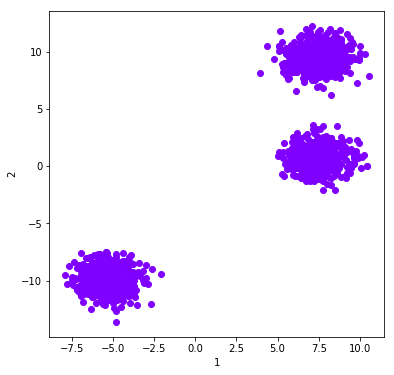

In [2]:
d.plot_data('parent')

### Compare results with and without using a random seed: Kmeans


In [3]:
c = oe.cluster(d)
c_seed = oe.cluster(d)
K = 4 # choose a K such that solution is not ideal
numIterations = 10
for i in range(1,numIterations):
    name = 'kmeans_' + str(i) #to append a new solution, it must have a name (dictionary key) that is unique
    c.cluster('parent', 'kmeans', name, K, init = 'random', n_init = 1)
    c_seed.cluster('parent', 'kmeans', name, K, random_seed=0, init = 'random', n_init = 1)

#### Mutual information should show results vary when seed is not forced to the same starting point

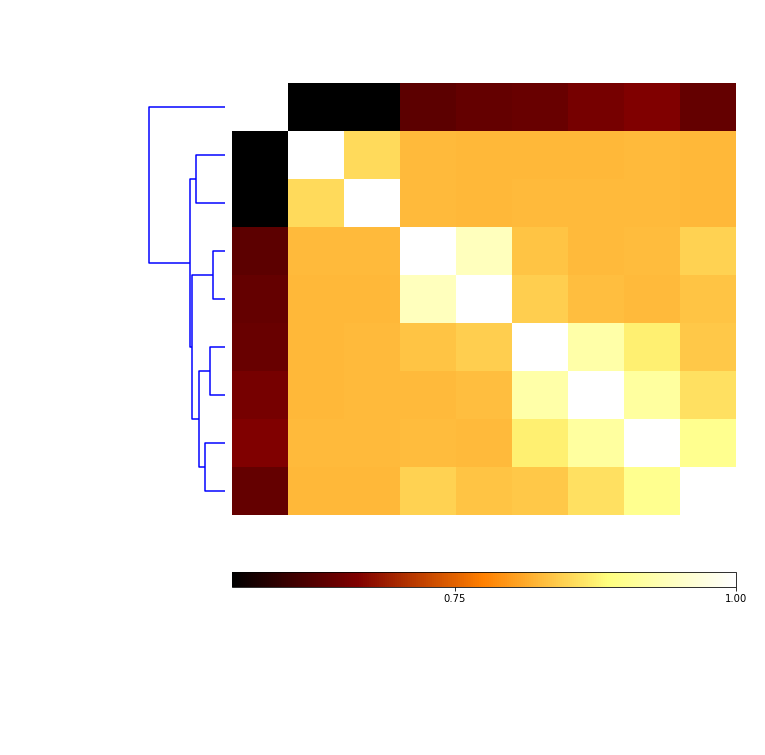

In [4]:
mi_randomSeeds = c.MI(MI_type='normalized')
mi_randomSeeds.plot(add_labels=False)

#### When the seed is forced to the same, Kmeans should return the same results, as indicated by mutual information of 1 between all clustering results.

/Users/knaegle/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0
  'left=%s, right=%s') % (left, right))


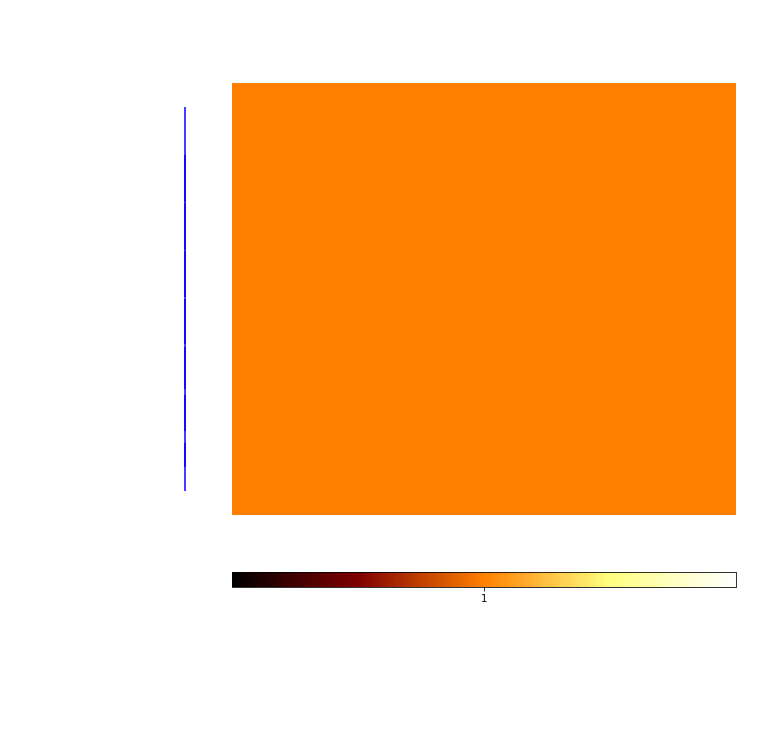

In [5]:

mi_sameSeeds = c_seed.MI(MI_type='normalized')
mi_sameSeeds.plot(add_labels=False)


### Compare results with and without random seed for spectral clustering


In [6]:
c = oe.cluster(d)
c_seed = oe.cluster(d)
K = 4 # choose a K such that solution is not ideal
numIterations = 10
for i in range(1,numIterations):
    name = 'spectral_' + str(i) #to append a new solution, it must have a name (dictionary key) that is unique
    c.cluster('parent', 'spectral', name, K)
    c_seed.cluster('parent', 'spectral', name, K, random_seed=0)

#### Mutual information should show results vary when seed is not forced to the same starting point

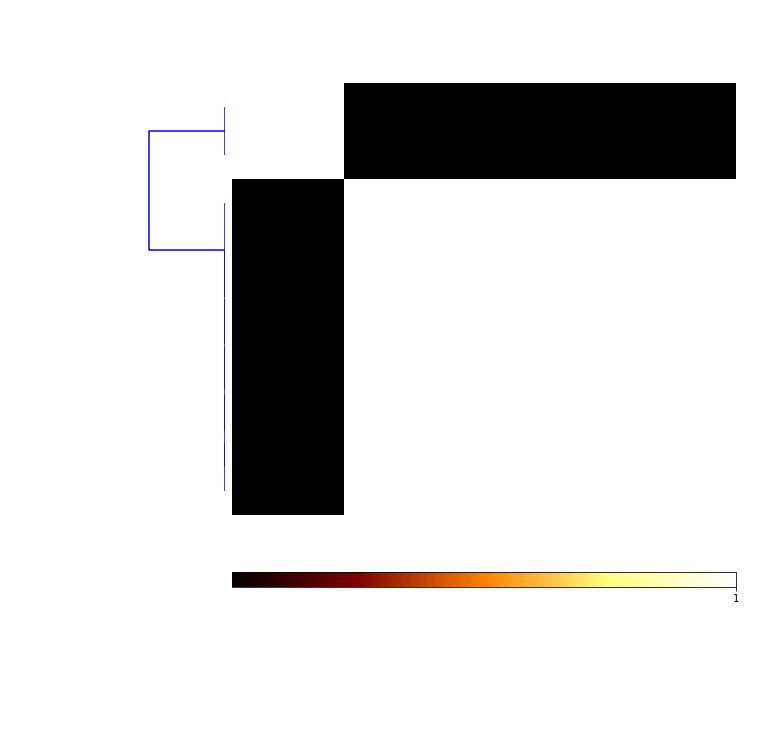

In [7]:
mi_randomSeeds = c.MI(MI_type='normalized')
mi_randomSeeds.plot(add_labels=False)

#### When the seed is forced to the same, Spectral clustering should return the same results, as indicated by mutual information of 1 between all clustering results.

/Users/knaegle/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0
  'left=%s, right=%s') % (left, right))


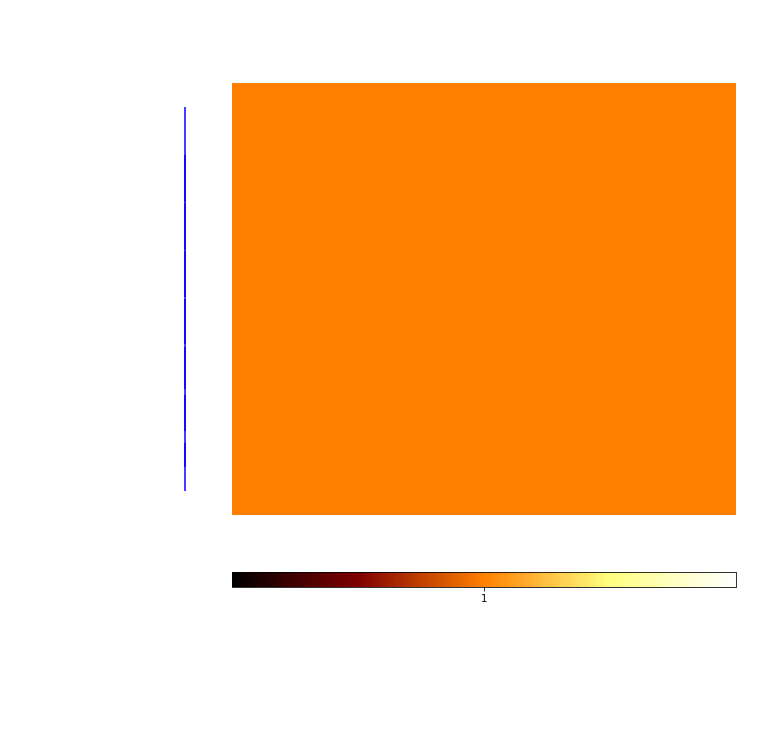

In [8]:

mi_sameSeeds = c_seed.MI(MI_type='normalized')
mi_sameSeeds.plot(add_labels=False)
